In [6]:
import os

from literalai import LiteralClient

from llama_index.core import Settings
from llama_index.core.callbacks import CallbackManager

from llama_index.core import StorageContext, ServiceContext, load_index_from_storage

from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.llms.groq import Groq
from dotenv import load_dotenv
load_dotenv()
import warnings
warnings.filterwarnings('ignore')

literal_client = LiteralClient(api_key=os.getenv("LITERAL_API_KEY"))

# Set a callback on LlamaIndex settings
Settings.callback_manager = CallbackManager([literal_client.llama_index_callback()])

In [2]:
GROQ_API_KEY = os.getenv("GROQ_API_KEY")
embed_model = HuggingFaceEmbedding(model_name="sentence-transformers/all-MiniLM-L6-v2")
llm = Groq(model="llama3-70b-8192", api_key=GROQ_API_KEY)
service_context = ServiceContext.from_defaults(embed_model=embed_model, llm=llm)
storage_context = StorageContext.from_defaults(persist_dir="../llamaindex/storage_mini")

In [3]:
index = load_index_from_storage(storage_context, service_context=service_context)
query_engine = index.as_query_engine(service_context=service_context)

In [4]:
@literal_client.thread(name="pdf_chatbot")
def rag_thread(query):
    return query_engine.query(query)


In [5]:
rag_thread("Explain market bonds?").response

"Bonds are debt instruments similar to loans, where the issuer is the debtor and the investor or buyer of the bond is the lender. The issuer promises to pay the interest and the nominal or face value of the security in the future. Bonds are traded securities, which means that the 'lender' does not have to keep the asset until maturity, they can sell it on the secondary market. The interest rate that the bond pays, also called the coupon rate, is not necessarily equal to the return expected by the investors."

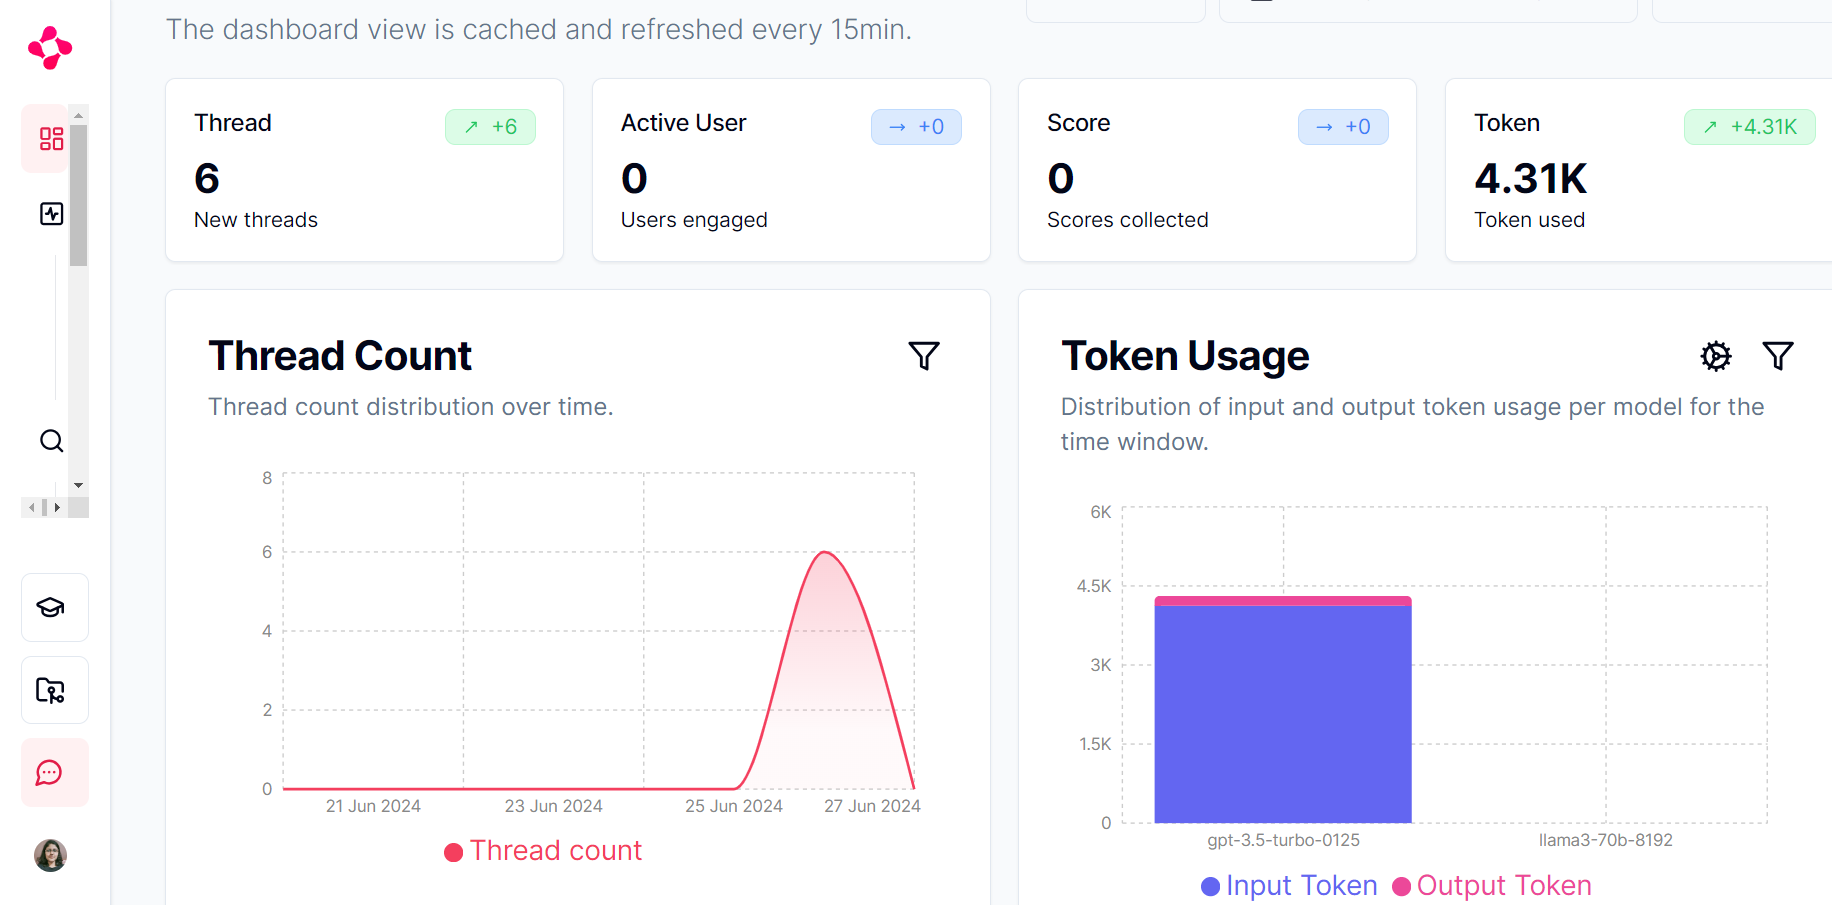

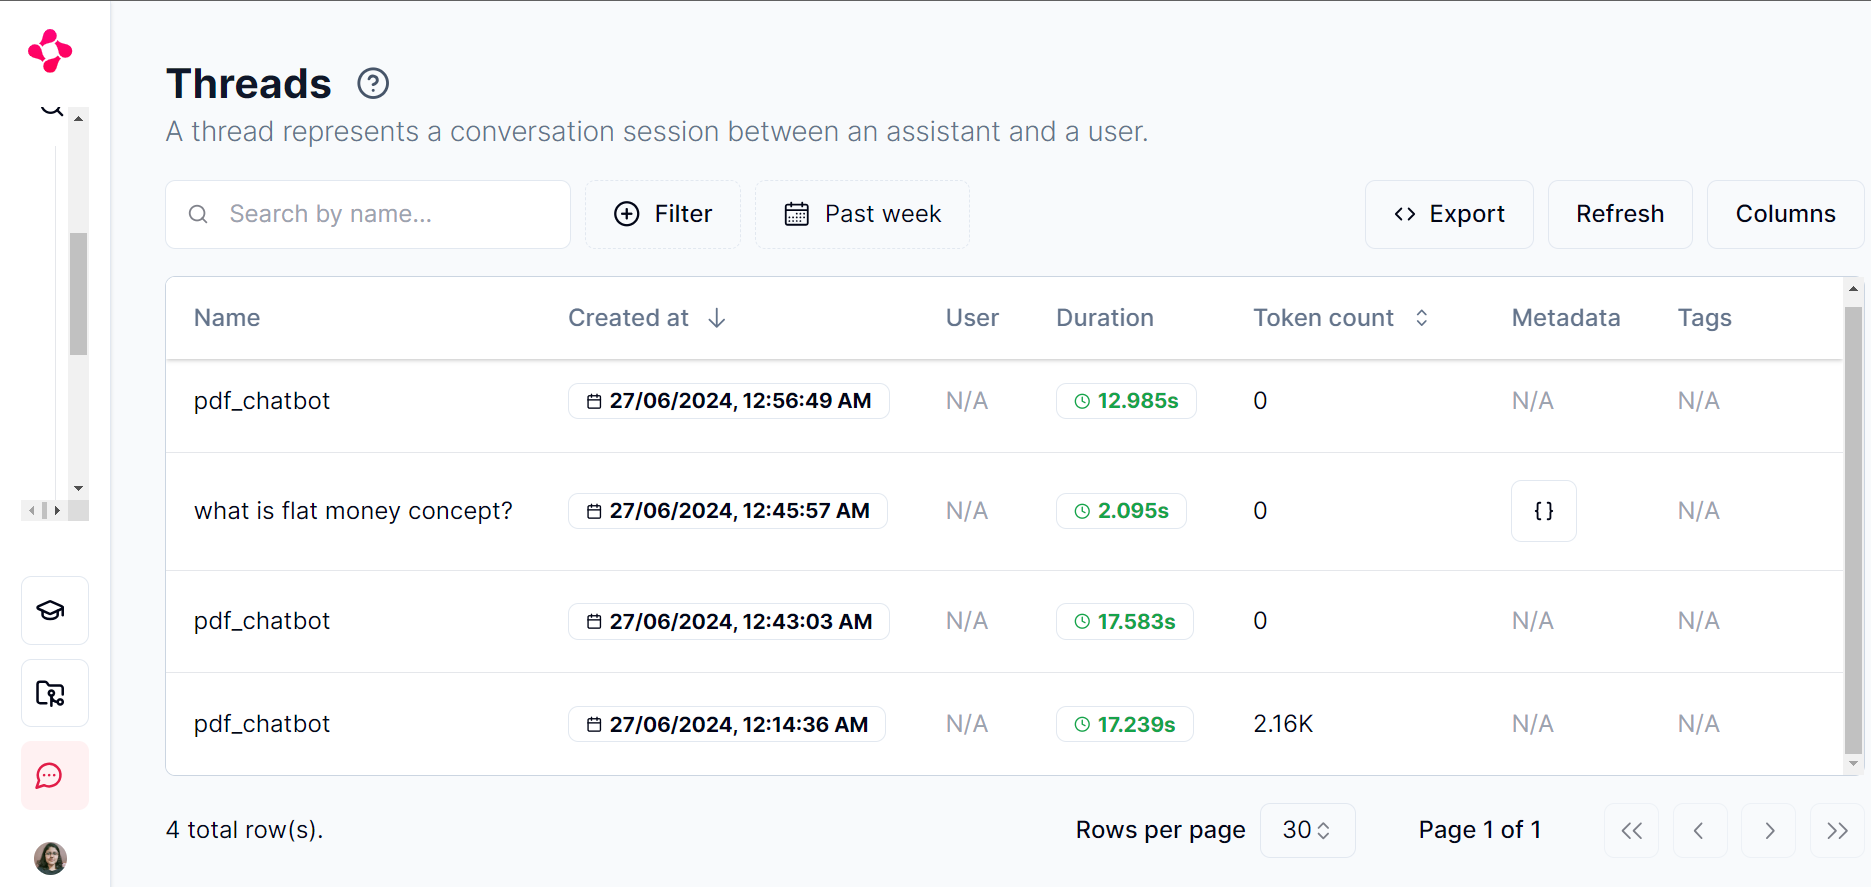

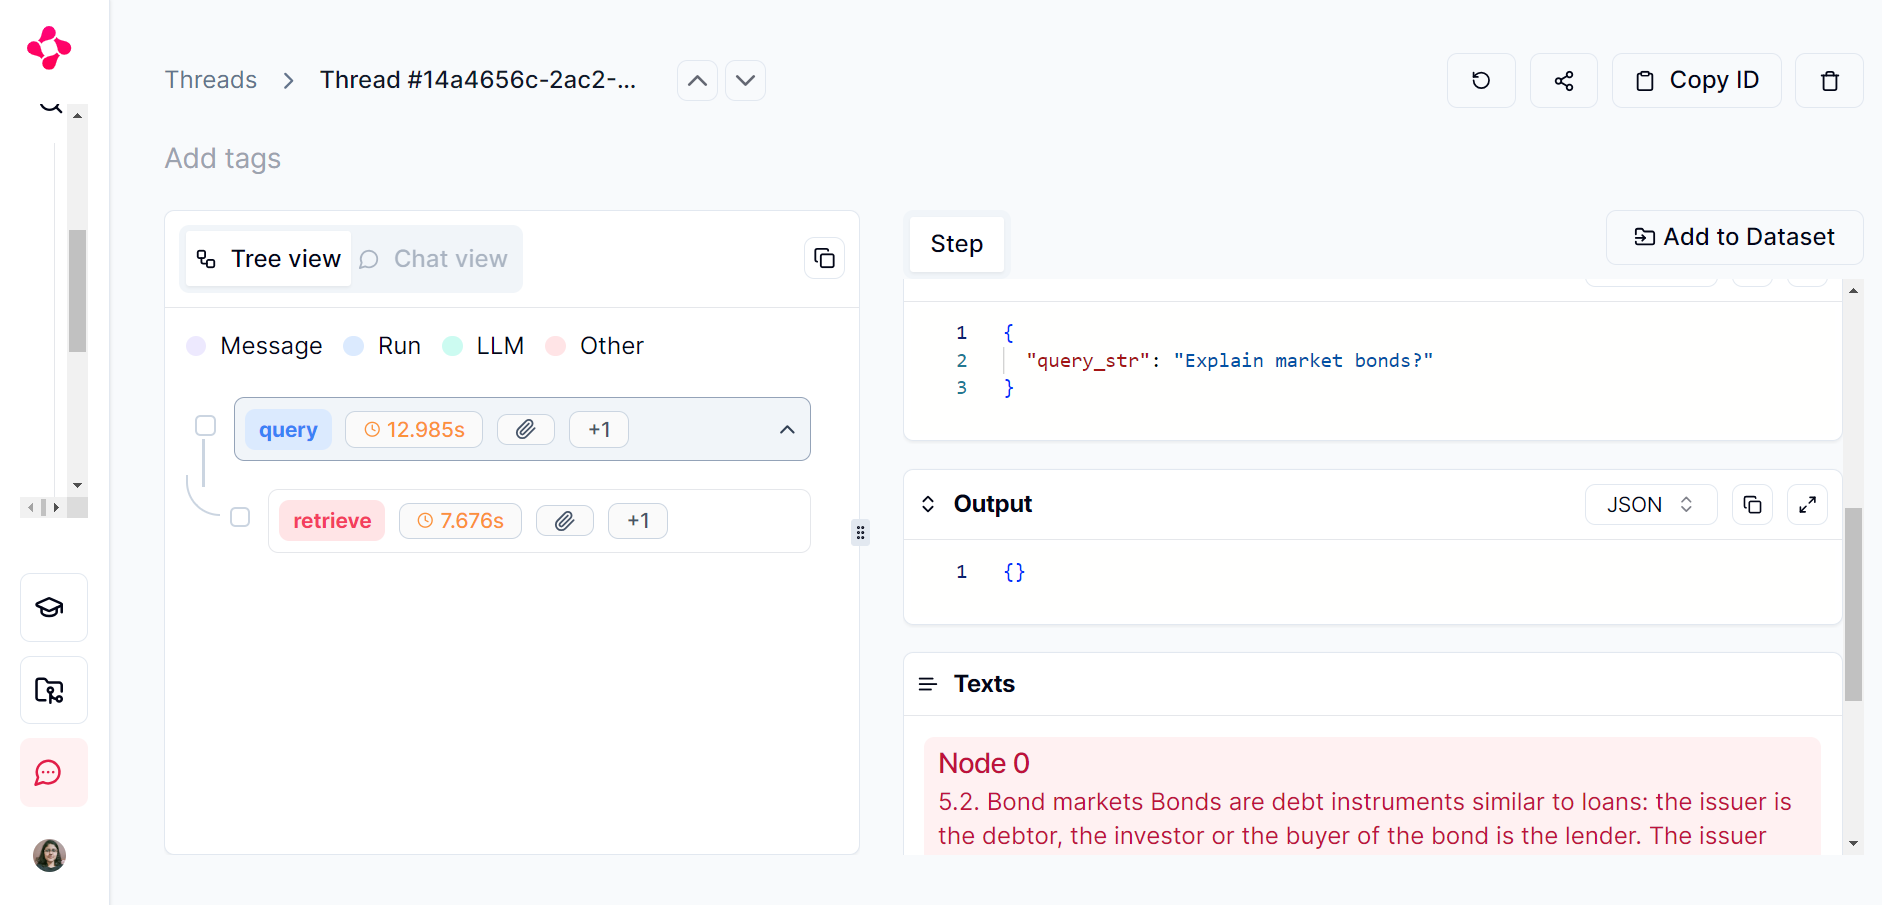